# RMSD

Analyse MD data with MDAnalysis to get the RMSF to the Holo state

In [1]:
import csv
import scipy.stats
import os
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
import datetime
import gzip
import pathlib
import os
import plotly.graph_objects as go
import kaleido

import matplotlib.pyplot as plt
import numpy
import scipy
from scipy import ndimage

%matplotlib inline

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [10]:
NN_training_dir = f"{os.getcwd()}/../ensembleFolding/exp2_enzyme_preliminary/bin/8sims"
os.makedirs(NN_training_dir, exist_ok=True)

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

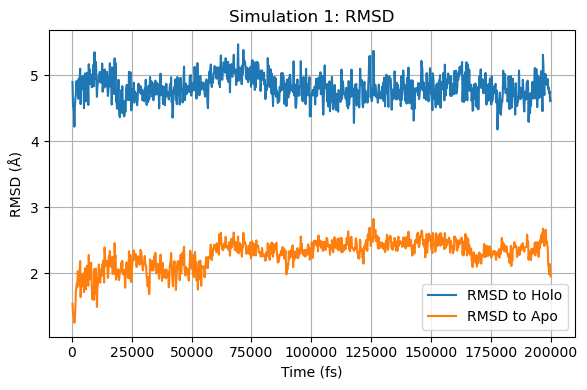

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

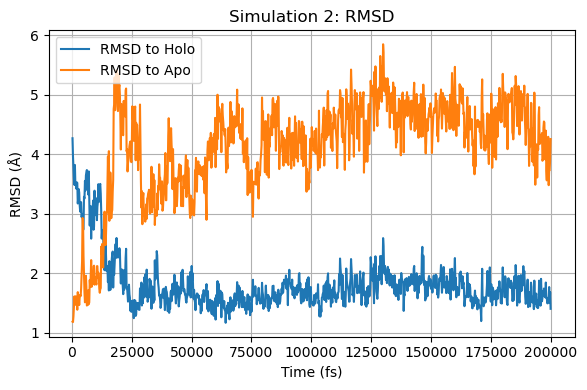

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

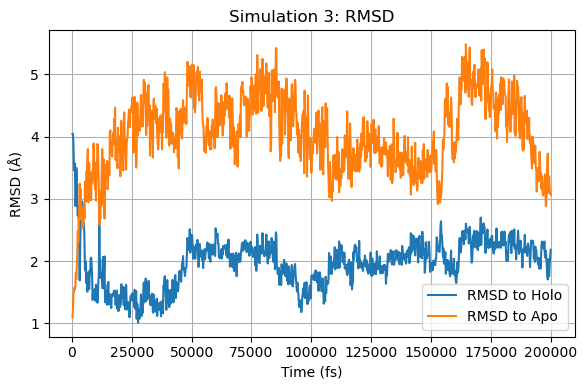

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

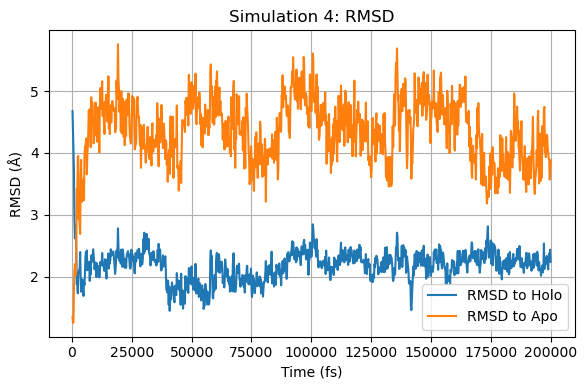

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

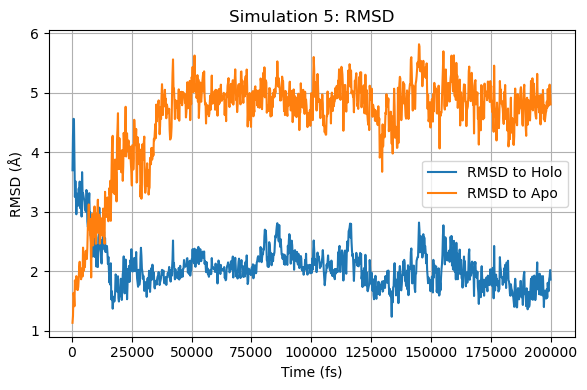

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

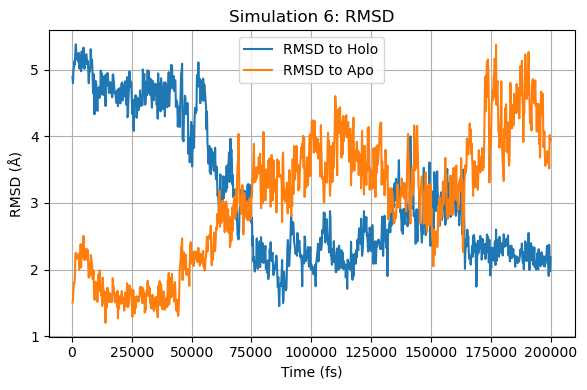

In [3]:

for sim in range(1, 7):
    apo_top = "Simulations/Apo/1anf_malremoved_t3p.parm7"
    apo_dcd = f"Simulations/Apo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"    
    hol_top = "Simulations/Holo/1anf_mal_t3p.parm7"
    hol_dcd = f"Simulations/Holo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"

    apo_crystal = f"{os.getcwd()}/Simulations/Apo/1anf_malremoved_tleap.pdb"  # Replace with the actual path to the apo crystal structure
    hol_crystal = f"{os.getcwd()}/Simulations/Holo/1omp.pdb"  # Replace with the actual path to the apo crystal structure

    # Load the apo trajectory
    u = mda.Universe(apo_top, apo_dcd)

    average = align.AverageStructure(u, u, select='protein and name CA',ref_frame=0).run()
    ref = average.results.universe

    # Load the apo crystal structure
    u_crystal_apo = mda.Universe(apo_crystal)

    # Load the holo crystal structure
    u_crystal_hol = mda.Universe(hol_crystal)

    # Align the apo crystal structure to the reference
    align.AlignTraj(u_crystal_apo, ref, select='protein and name CA', in_memory=True).run()

    # Align the holo crystal structure to the reference
    align.AlignTraj(u_crystal_hol, ref, select='protein and name CA', in_memory=True).run()

    # Select the protein atoms in the apo trajectory and the apo crystal structure
    protein_atoms_traj_apo = u.select_atoms('protein and name CA')
    protein_atoms_crystal_apo = u_crystal_apo.select_atoms('protein and name CA')

    # Select the protein atoms in the holo trajectory and the holo crystal structure
    protein_atoms_crystal_hol = u_crystal_hol.select_atoms('protein and name CA')

    # Calculate RMSD for apo
    RMSD_apo = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_apo).run()

    # Calculate RMSD for holo
    RMSD_hol = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_hol).run()

    # Plot RMSD against time for both apo and holo
    plt.figure(figsize=(6, 4))
    plt.plot(RMSD_hol.rmsd[:, 1], RMSD_hol.rmsd[:, 2], label=f'RMSD to Holo')
    plt.plot(RMSD_apo.rmsd[:, 1], RMSD_apo.rmsd[:, 2], label=f'RMSD to Apo')
    plt.xlabel('Time (fs)')
    plt.ylabel('RMSD (Å)')
    plt.title(f'Simulation {sim}: RMSD')
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.png")
    plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.pdf")
    # Save RMSD data to NN_training_dir
    np.save(f"{NN_training_dir}/RMSD_apo_simulation_{sim}.npy", RMSD_apo.rmsd)
    np.save(f"{NN_training_dir}/RMSD_hol_simulation_{sim}.npy", RMSD_hol.rmsd)
    plt.show()

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

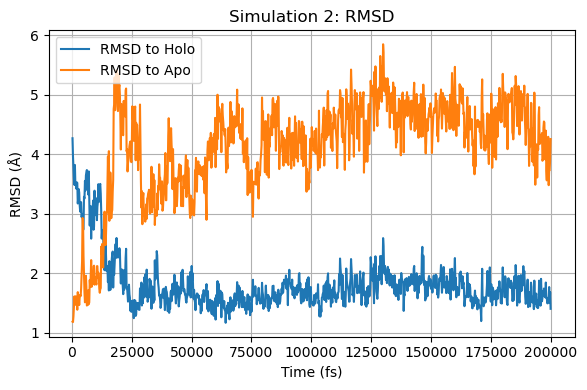

In [96]:
sim = 2
apo_top = "Simulations/Apo/1anf_malremoved_t3p.parm7"
apo_dcd = f"Simulations/Apo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"    
hol_top = "Simulations/Holo/1anf_mal_t3p.parm7"
hol_dcd = f"Simulations/Holo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"

apo_crystal = f"{os.getcwd()}/Simulations/Apo/1anf_malremoved_tleap.pdb"  # Replace with the actual path to the apo crystal structure
hol_crystal = f"{os.getcwd()}/Simulations/Holo/1omp.pdb"  # Replace with the actual path to the apo crystal structure

# Load the apo trajectory
u = mda.Universe(apo_top, apo_dcd)

average = align.AverageStructure(u, u, select='protein and name CA',ref_frame=0).run()
ref = average.results.universe

# Load the apo crystal structure
u_crystal_apo = mda.Universe(apo_crystal)

# Load the holo crystal structure
u_crystal_hol = mda.Universe(hol_crystal)

# Align the apo crystal structure to the reference
align.AlignTraj(u_crystal_apo, ref, select='protein and name CA', in_memory=True).run()

# Align the holo crystal structure to the reference
align.AlignTraj(u_crystal_hol, ref, select='protein and name CA', in_memory=True).run()

# Select the protein atoms in the apo trajectory and the apo crystal structure
protein_atoms_traj_apo = u.select_atoms('protein and name CA')
protein_atoms_crystal_apo = u_crystal_apo.select_atoms('protein and name CA')

# Select the protein atoms in the holo trajectory and the holo crystal structure
protein_atoms_crystal_hol = u_crystal_hol.select_atoms('protein and name CA')

# Calculate RMSD for apo
RMSD_apo = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_apo).run()

# Calculate RMSD for holo
RMSD_hol = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_hol).run()

# Plot RMSD against time for both apo and holo
plt.figure(figsize=(6, 4))
plt.plot(RMSD_hol.rmsd[:, 1], RMSD_hol.rmsd[:, 2], label=f'RMSD to Holo')
plt.plot(RMSD_apo.rmsd[:, 1], RMSD_apo.rmsd[:, 2], label=f'RMSD to Apo')
plt.xlabel('Time (fs)')
plt.ylabel('RMSD (Å)')
plt.title(f'Simulation {sim}: RMSD')
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.png")
plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.pdf")
plt.show()


# Get the trajectory up to 75000 fs
u.trajectory[0:75000]

uptoIdx: 375
Number of CA atoms: 370
Dim: 1110
All positions are different: False
RMSD to Hol: (375,)
Max RMSD to Holo: 4.269307932598844
Min RMSD to Holo: 1.1707742104912118


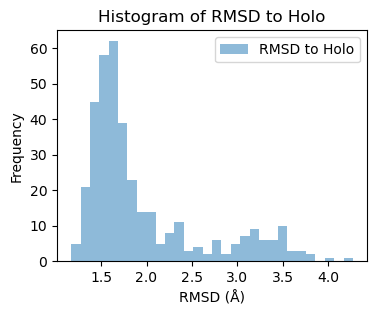

Cluster 1: (-inf, 3.3) (347, 370, 3)
Cluster 2: (3.3, 4.0) (27, 370, 3)
Cluster 3: (4.0, inf) (1, 370, 3)


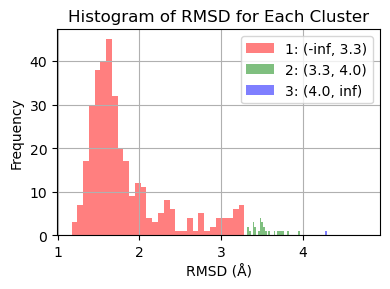

Reversed and Normalised cluster centers: [0.  0.5 1. ]
Cluster 1: 0.00 (347, 370, 3) Mean RMSD to Apo: 1.82
Cluster 2: 0.50 (27, 370, 3) Mean RMSD to Apo: 3.54
Cluster 3: 1.00 (1, 370, 3) Mean RMSD to Apo: 4.27
Using 100.0% of the data, which is 375 frames


In [100]:
uptoIdx = np.ceil(75 / 200 * u.trajectory.n_frames).astype(int)
print(f"uptoIdx: {uptoIdx}")

ca_atoms = u.select_atoms('protein and name CA')
print("Number of CA atoms:", len(ca_atoms))
print(f"Dim: {ca_atoms.n_atoms*3}")

# Extract timeseries data using the `.timeseries()` method
# Shape: (num_frames, num_CA_atoms, 3)
Xtraj = np.empty((uptoIdx, ca_atoms.n_atoms, 3))

# Iterate over the entire trajectory and store Cα positions
for i, y_clustered in enumerate(u.trajectory[:uptoIdx]):
    Xtraj[i] = ca_atoms.positions  # Store positions of Cα atoms
    
# Check if all positions are different
all_positions_different = (np.diff(Xtraj, axis=0) == 0).any()
print(f"All positions are different: {all_positions_different}")



RMSD_hol_values = RMSD_hol.results.rmsd[:uptoIdx, 2]

print("RMSD to Hol:", RMSD_hol_values.shape)
print("Max RMSD to Holo:", np.max(RMSD_hol_values))
print("Min RMSD to Holo:", np.min(RMSD_hol_values))

plt.figure(figsize=(4, 3))
plt.hist(RMSD_hol_values, bins=30, alpha=0.5, label='RMSD to Holo')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of RMSD to Holo')
plt.legend()
plt.show()


# Use a specified cluster ranges to divide data into n_clusters
clusters = [(-float('inf'), 2.5), (2.5, 3.5), (3.5, 4.5), (4.5, float('inf'))]
clusters = [(-float('inf'), 3.3), (3.3, 4.0), (4.0, float('inf'))]
n_clusters = len(clusters)
window_size = 0.8
y_clustered = []  # stores the cluster centers
X_clustered = []
RMSD_clustered = []


for i in range(n_clusters):
    lb, ub = clusters[i]
    x_ids = np.where((RMSD_hol_values >= lb) & (RMSD_hol_values <= ub))[0]
    
    data = Xtraj[x_ids]
    X_clustered.append(data)
    y_clustered.append(i)
    RMSD_clustered.append(RMSD_hol_values[x_ids])
    print(f"Cluster {i+1}: {(lb, ub)} {data.shape}")

y_clustered = np.array(y_clustered)
y_clustered = y_clustered / y_clustered.max()


# Plot histogram for each cluster with different colors
# colors = ['r', 'g', 'b', 'c']
colors = plt.get_cmap('Set1').colors[1:]

plt.figure(figsize=(4, 3))
for i, (data, color) in enumerate(zip(RMSD_clustered, colors[:n_clusters])):
    plt.hist(data, bins=30, alpha=0.5, label=f'{i+1}: {clusters[i]}', color=color)
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of RMSD for Each Cluster')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

print("Reversed and Normalised cluster centers:", y_clustered)
for i in range(len(X_clustered)):
    print(f"Cluster {i+1}: {y_clustered[i]:.2f} {X_clustered[i].shape} Mean RMSD to Apo: {np.mean(RMSD_clustered[i]):.2f}")


num_frames = np.array([len(x) for x in X_clustered]).sum()
percentage = num_frames / uptoIdx * 100
print(f"Using {percentage}% of the data, which is {num_frames} frames")

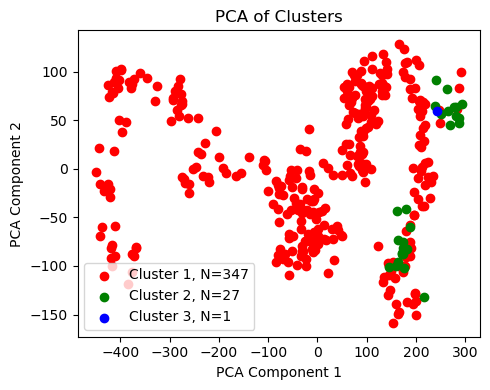

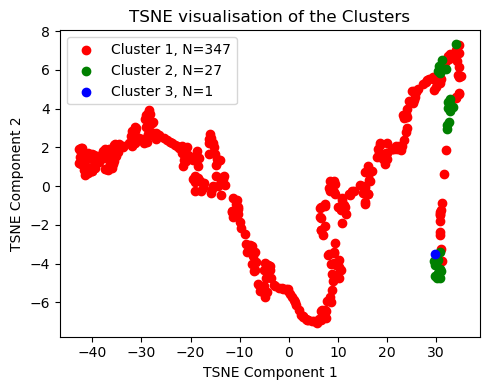

In [101]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Flatten the entire dataset for PCA and TSNE
X_MDS_visualisation = np.concatenate(X_clustered, axis=0)
X_MDS_visualisation = X_MDS_visualisation.reshape(len(X_MDS_visualisation), -1)

# Perform PCA on the entire dataset
pca_all = PCA(n_components=2)
X_pca_all = pca_all.fit_transform(X_MDS_visualisation)

# Perform TSNE on the entire dataset
tsne_all = TSNE(n_components=2, random_state=42)
X_tsne_all = tsne_all.fit_transform(X_MDS_visualisation)

N_cluster = [X_clustered[i].shape[0] for i in range(len(X_clustered))]
N_cluster.insert(0, 0)
cluster_ranges = np.cumsum(N_cluster)

# Plot PCA results for each cluster
plt.figure(figsize=(5, 4))
for i in range(n_clusters):
    plt.scatter(X_pca_all[cluster_ranges[i]:cluster_ranges[i+1], 0], X_pca_all[cluster_ranges[i]:cluster_ranges[i+1], 1], color=colors[i], label=f'Cluster {i+1}, N={len(X_clustered[i])}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters')
plt.tight_layout()
plt.legend()
plt.show()

# Plot TSNE results for each cluster
plt.figure(figsize=(5, 4))
for i in range(n_clusters):
    plt.scatter(X_tsne_all[cluster_ranges[i]:cluster_ranges[i+1], 0], X_tsne_all[cluster_ranges[i]:cluster_ranges[i+1], 1], color=colors[i], label=f'Cluster {i+1}, N={len(X_clustered[i])}')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE visualisation of the Clusters')
plt.tight_layout()
plt.legend()
plt.show()

In [156]:
os.getcwd()

'/home/ubuntu22/Documents/PhD/oshea-j-wood-c-pbp-design-2023'

In [ ]:

# save the cluster data

# NN_training_dir = f"{os.getcwd()}/../ensembleFolding/exp2_enzyme_preliminary/bin"

# Create directories if they do not exist
os.makedirs(NN_training_dir, exist_ok=True)

for i, x in enumerate(X_clustered):
    np.save(f"{NN_training_dir}/cluster_{i+1}.npy", x)
for i, x in enumerate(RMSD_clustered):
    np.save(f"{NN_training_dir}/cluster_RMSD_{i+1}.npy", x)
np.save(f"{NN_training_dir}/cluster_centers.npy", y_clustered)

/tmp/ipykernel_2917647/2651956751.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


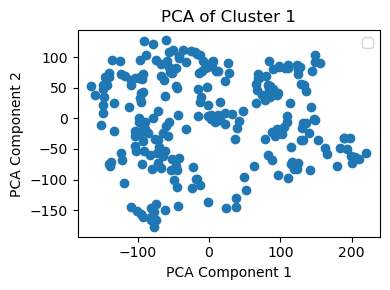

/tmp/ipykernel_2917647/2651956751.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


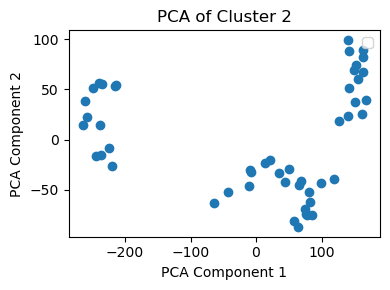

/tmp/ipykernel_2917647/2651956751.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


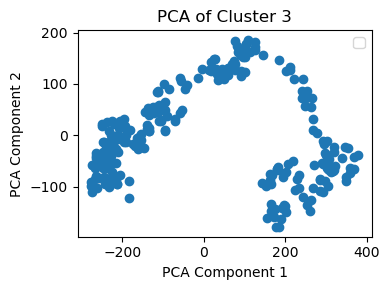

/tmp/ipykernel_2917647/2651956751.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


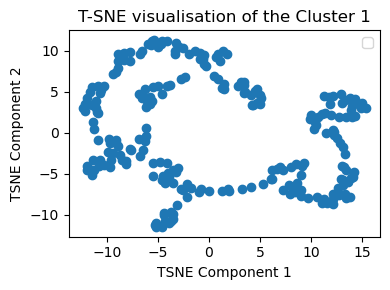

/tmp/ipykernel_2917647/2651956751.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


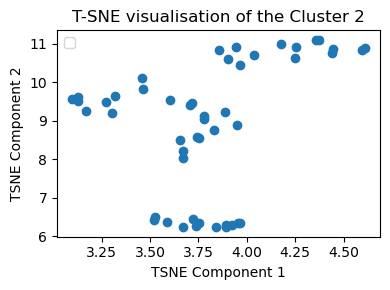

/tmp/ipykernel_2917647/2651956751.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


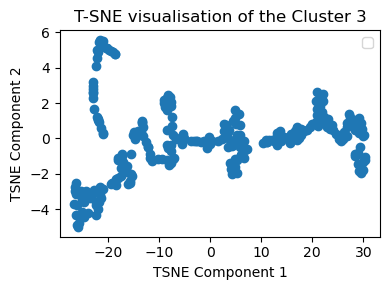

In [51]:
## What does a single cluster look like?

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


for cluster_id in range(n_clusters):

    # Flatten the data for PCA
    X_flat = X_clustered[cluster_id].reshape(len(X_clustered[cluster_id]), -1)  # xs[0].shape == (num_frames, num_CA_atoms, 3)  e.g. (264, 370, 3)

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_flat)

    # Plot the PCA results
    plt.figure(figsize=(4, 3))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'PCA of Cluster {cluster_id+1}')
    plt.tight_layout()
    plt.legend()
    plt.show()

for cluster_id in range(n_clusters):

    # Flatten the data for PCA
    X_flat = X_clustered[cluster_id].reshape(len(X_clustered[cluster_id]), -1)  # xs[0].shape == (num_frames, num_CA_atoms, 3)  e.g. (264, 370, 3)

    # Perform T-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_flat)

    # Plot the T-SNE results
    plt.figure(figsize=(4, 3))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.title(f'T-SNE visualisation of the Cluster {cluster_id+1}')
    plt.tight_layout()
    plt.legend()
    plt.show()

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

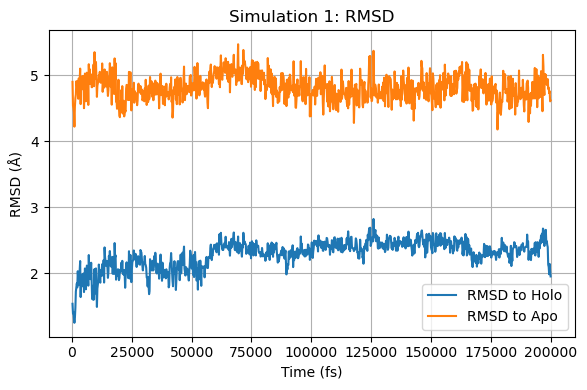

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

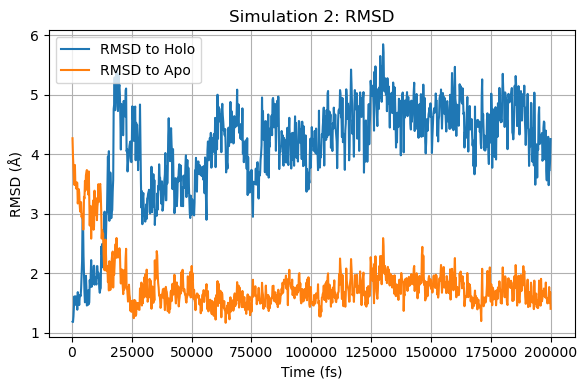

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

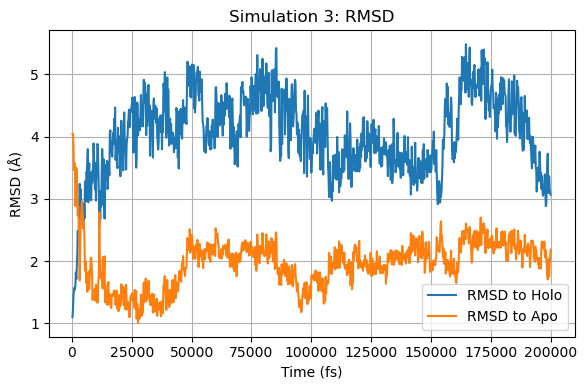

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

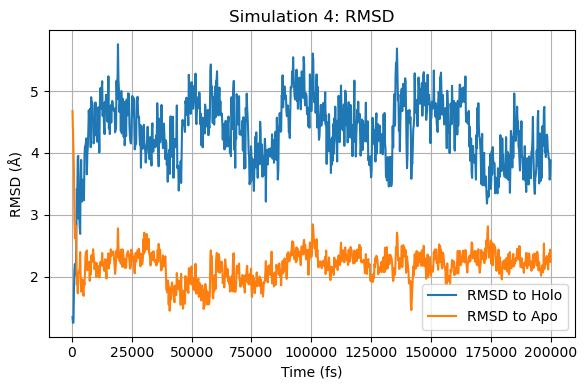

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

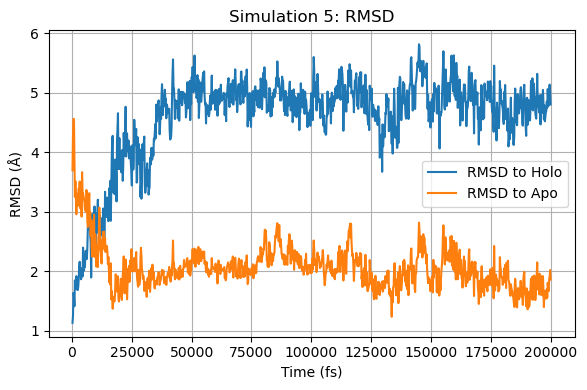

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

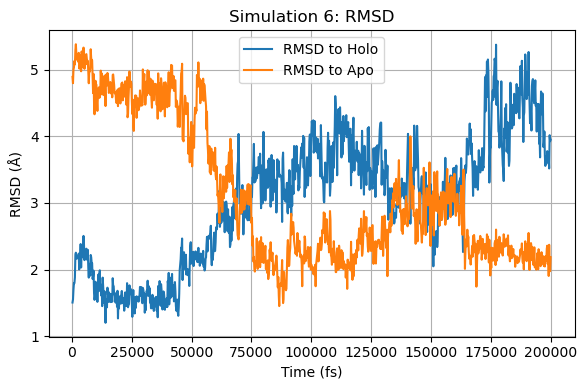

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

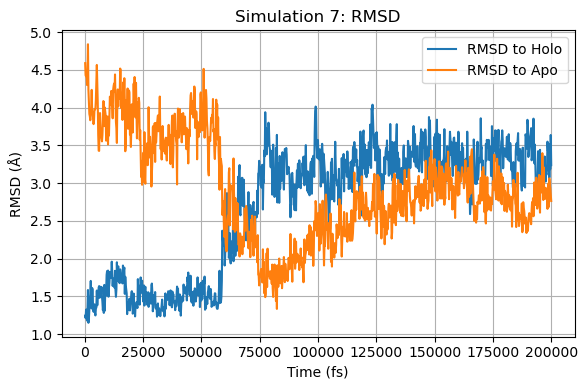

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

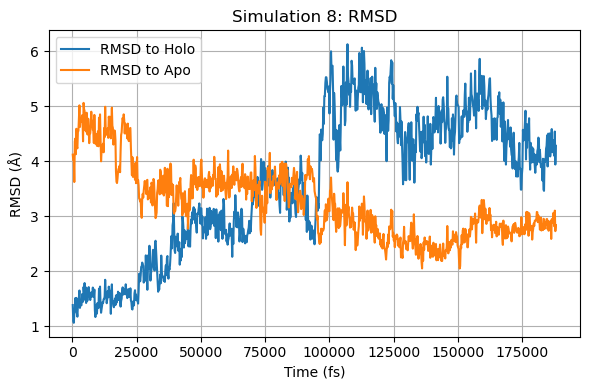

In [19]:
sims = range(1, 9)
results = {}

for sim in sims:
    apo_top = "Simulations/Apo/1anf_malremoved_t3p.parm7"
    apo_dcd = f"Simulations/Apo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"    
    hol_top = "Simulations/Holo/1anf_mal_t3p.parm7"
    hol_dcd = f"Simulations/Holo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"

    apo_crystal = f"{os.getcwd()}/Simulations/Apo/1anf_malremoved_tleap.pdb"  # Replace with the actual path to the apo crystal structure
    hol_crystal = f"{os.getcwd()}/Simulations/Holo/1omp.pdb"  # Replace with the actual path to the apo crystal structure

    # Load the apo trajectory
    u = mda.Universe(apo_top, apo_dcd)

    average = align.AverageStructure(u, u, select='protein and name CA', ref_frame=0).run()
    ref = average.results.universe

    # Load the apo crystal structure
    u_crystal_apo = mda.Universe(apo_crystal)

    # Load the holo crystal structure
    u_crystal_hol = mda.Universe(hol_crystal)

    # Align the apo crystal structure to the reference
    align.AlignTraj(u_crystal_apo, ref, select='protein and name CA', in_memory=True).run()

    # Align the holo crystal structure to the reference
    align.AlignTraj(u_crystal_hol, ref, select='protein and name CA', in_memory=True).run()

    # Select the protein atoms in the apo trajectory and the apo crystal structure
    protein_atoms_traj_apo = u.select_atoms('protein and name CA')
    protein_atoms_crystal_apo = u_crystal_apo.select_atoms('protein and name CA')

    # Select the protein atoms in the holo trajectory and the holo crystal structure
    protein_atoms_crystal_hol = u_crystal_hol.select_atoms('protein and name CA')

    # Calculate RMSD for apo
    RMSD_hol = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_apo).run()

    # Calculate RMSD for holo
    RMSD_apo = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_hol).run()

    # Extract timeseries data using the `.timeseries()` method
    # Shape: (num_frames, num_CA_atoms, 3)
    uptoIdx = np.ceil(200 / 200 * u.trajectory.n_frames).astype(int)
    Xtraj = np.empty((uptoIdx, protein_atoms_traj_apo.n_atoms, 3))

    # Iterate over the entire trajectory and store Cα positions
    for i, y_clustered in enumerate(u.trajectory[:uptoIdx]):
        Xtraj[i] = protein_atoms_traj_apo.positions  # Store positions of Cα atoms

    # Store results in the dictionary
    results[sim] = {
        'RMSD_apo': RMSD_apo,
        'RMSD_hol': RMSD_hol,
        'protein_atoms_traj_apo': protein_atoms_traj_apo,
        'protein_atoms_crystal_apo': protein_atoms_crystal_apo,
        'protein_atoms_crystal_hol': protein_atoms_crystal_hol,
        'Xtraj': Xtraj
    }

    # Plot RMSD against time for both apo and holo
    plt.figure(figsize=(6, 4))
    plt.plot(RMSD_hol.rmsd[:, 1], RMSD_hol.rmsd[:, 2], label=f'RMSD to Holo')
    plt.plot(RMSD_apo.rmsd[:, 1], RMSD_apo.rmsd[:, 2], label=f'RMSD to Apo')
    plt.xlabel('Time (fs)')
    plt.ylabel('RMSD (Å)')
    plt.title(f'Simulation {sim}: RMSD')
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.png")
    plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.pdf")
    plt.savefig(f"{NN_training_dir}/RMSD_to_closed_{sim}.png")
    plt.savefig(f"{NN_training_dir}/RMSD_to_closed_{sim}.pdf")
    plt.show()


RMSD to Hol: (7520,)
Max RMSD to Holo: 6.127659227014363
Min RMSD to Holo: 1.064075497042819


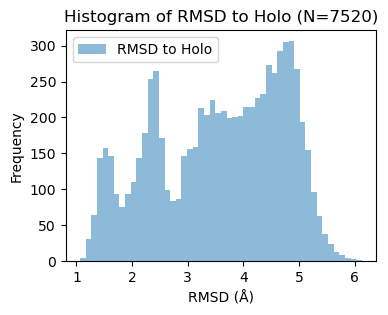

In [20]:

# concate the data for all simulations, and plot the histogram
RMSD_hol_values = np.concatenate([results[sim]['RMSD_hol'].results.rmsd[:uptoIdx, 2] for sim in sims])

print("RMSD to Hol:", RMSD_hol_values.shape)
print("Max RMSD to Holo:", np.max(RMSD_hol_values))
print("Min RMSD to Holo:", np.min(RMSD_hol_values))

plt.figure(figsize=(4, 3))
plt.hist(RMSD_hol_values, bins=50, alpha=0.5, label=f'RMSD to Holo')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.title(f'Histogram of RMSD to Holo (N={len(RMSD_hol_values)})')
plt.legend()
plt.savefig(f"{NN_training_dir}/RMSD_histogram.png")
plt.savefig(f"{NN_training_dir}/RMSD_histogram.pdf")
plt.show()


Number of CA atoms: 370
Dim: 1110
All positions are different: True
RMSD to Hol: (7520,)
Max RMSD to Holo: 6.127659227014363
Min RMSD to Holo: 1.064075497042819


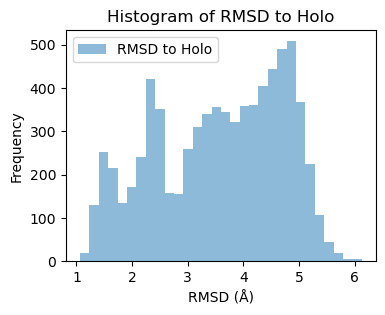

Cluster 1: (-inf, 2.8) (2127, 370, 3)
Cluster 2: (2.8, 4.2) (2619, 370, 3)
Cluster 3: (4.2, inf) (2774, 370, 3)


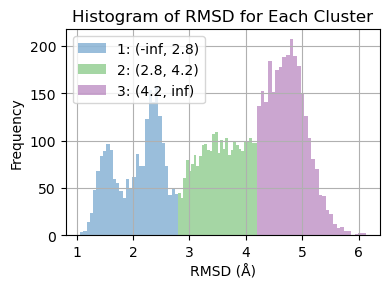

Reversed and Normalised cluster centers: [0.  0.5 1. ]
Cluster 1: 0.00 (2127, 370, 3) Mean RMSD to Apo: 2.07
Cluster 2: 0.50 (2619, 370, 3) Mean RMSD to Apo: 3.55
Cluster 3: 1.00 (2774, 370, 3) Mean RMSD to Apo: 4.76


In [21]:

# Concatenate the data for all simulations
Xtraj_all = np.concatenate([results[sim]['Xtraj'] for sim in sims], axis=0)
ca_atoms = u.select_atoms('protein and name CA')
print("Number of CA atoms:", len(ca_atoms))
print(f"Dim: {ca_atoms.n_atoms*3}")

# Reshape the concatenated data
Xtraj_all = Xtraj_all.reshape(-1, ca_atoms.n_atoms, 3)
    
# Check if all positions are different
all_positions_different = (np.diff(Xtraj_all, axis=0) == 0).any()
print(f"All positions are different: {all_positions_different}")



RMSDs_all = np.concatenate([results[sim]['RMSD_hol'].results.rmsd[:uptoIdx, 2] for sim in sims])

print("RMSD to Hol:", RMSDs_all.shape)
print("Max RMSD to Holo:", np.max(RMSDs_all))
print("Min RMSD to Holo:", np.min(RMSDs_all))

plt.figure(figsize=(4, 3))
plt.hist(RMSDs_all, bins=30, alpha=0.5, label='RMSD to Holo')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of RMSD to Holo')
plt.legend()
plt.show()


# Use a specified cluster ranges to divide data into n_clusters
clusters = [(-float('inf'), 2.8), (2.8, 4.2), (4.2, float('inf'))]
n_clusters = len(clusters)
window_size = 0.8
y_clustered = []  # stores the cluster centers
X_clustered = []
RMSD_clustered = []


for i in range(n_clusters):
    lb, ub = clusters[i]
    x_ids = np.where((RMSDs_all >= lb) & (RMSDs_all <= ub))[0]
    
    data = Xtraj_all[x_ids]
    X_clustered.append(data)
    y_clustered.append(i)
    RMSD_clustered.append(RMSDs_all[x_ids])
    print(f"Cluster {i+1}: {(lb, ub)} {data.shape}")

y_clustered = np.array(y_clustered)
y_clustered = y_clustered / y_clustered.max()


# Plot histogram for each cluster with different colors
colors = plt.get_cmap('Set1').colors[1:]

plt.figure(figsize=(4, 3))
for i, (data, color) in enumerate(zip(RMSD_clustered, colors[:n_clusters])):
    plt.hist(data, bins=30, alpha=0.5, label=f'{i+1}: {clusters[i]}', color=color)
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of RMSD for Each Cluster')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig(f"{NN_training_dir}/RMSD_histogram_clusters.png")
plt.savefig(f"{NN_training_dir}/RMSD_histogram_clusters.pdf")
plt.show()

print("Reversed and Normalised cluster centers:", y_clustered)
for i in range(len(X_clustered)):
    print(f"Cluster {i+1}: {y_clustered[i]:.2f} {X_clustered[i].shape} Mean RMSD to Apo: {np.mean(RMSD_clustered[i]):.2f}")


In [22]:
[X_clustered[i].shape[0] for i in range(len(X_clustered))]

[2127, 2619, 2774]

In [23]:
cluster_ranges = [X_clustered[i].shape[0] for i in range(len(X_clustered))]
cluster_ranges.insert(0, 0)
np.cumsum(cluster_ranges)

array([   0, 2127, 4746, 7520])

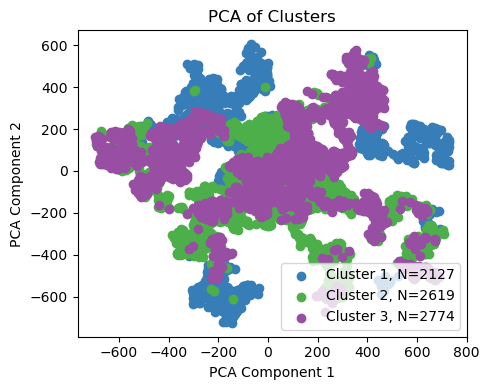

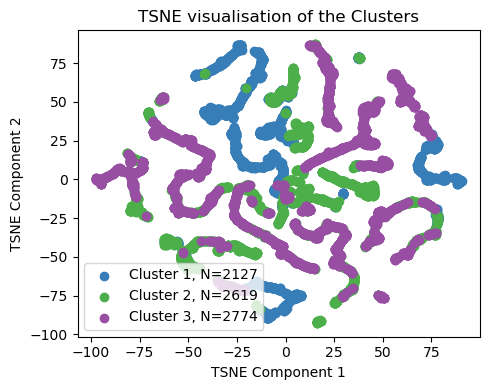

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Flatten the entire dataset for PCA and TSNE
X_MDS_visualisation = np.concatenate(X_clustered, axis=0)
X_MDS_visualisation = X_MDS_visualisation.reshape(len(X_MDS_visualisation), -1)

# Perform PCA on the entire dataset
pca_all = PCA(n_components=2)
X_pca_all = pca_all.fit_transform(X_MDS_visualisation)

# Perform TSNE on the entire dataset
tsne_all = TSNE(n_components=2, random_state=42)
X_tsne_all = tsne_all.fit_transform(X_MDS_visualisation)

N_cluster = [X_clustered[i].shape[0] for i in range(len(X_clustered))]
N_cluster.insert(0, 0)
cluster_ranges = np.cumsum(N_cluster)

# Plot PCA results for each cluster
plt.figure(figsize=(5, 4))
for i in range(n_clusters):
    plt.scatter(X_pca_all[cluster_ranges[i]:cluster_ranges[i+1], 0], X_pca_all[cluster_ranges[i]:cluster_ranges[i+1], 1], color=colors[i], label=f'Cluster {i+1}, N={len(X_clustered[i])}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters')
plt.tight_layout()
plt.legend()
plt.savefig(f"{NN_training_dir}/PCA_clusters.png")
plt.savefig(f"{NN_training_dir}/PCA_clusters.pdf")
plt.show()

# Plot TSNE results for each cluster
plt.figure(figsize=(5, 4))
for i in range(n_clusters):
    plt.scatter(X_tsne_all[cluster_ranges[i]:cluster_ranges[i+1], 0], X_tsne_all[cluster_ranges[i]:cluster_ranges[i+1], 1], color=colors[i], label=f'Cluster {i+1}, N={len(X_clustered[i])}')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE visualisation of the Clusters')
plt.tight_layout()
plt.legend()
plt.savefig(f"{NN_training_dir}/TSNE_clusters.png")
plt.savefig(f"{NN_training_dir}/TSNE_clusters.pdf")
plt.show()


In [25]:
# save the cluster data

# NN_training_dir = f"{os.getcwd()}/../ensembleFolding/exp2_enzyme_preliminary/bin/5sims"

# Create directories if they do not exist
os.makedirs(NN_training_dir, exist_ok=True)

for i, x in enumerate(X_clustered):
    np.save(f"{NN_training_dir}/cluster_{i+1}.npy", x)
for i, x in enumerate(RMSD_clustered):
    np.save(f"{NN_training_dir}/cluster_RMSD_{i+1}.npy", x)
np.save(f"{NN_training_dir}/cluster_centers.npy", y_clustered)

In [26]:
total_data_points = sum([x.shape[0] for x in X_clustered])
print(f"Total number of data points in X_clustered: {total_data_points}")

Total number of data points in X_clustered: 7520
